In [319]:
# importation des librairies
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt

### Importation des données

In [320]:
data=datasets.load_boston() # FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

C:\Users\Sadou BARRY\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing data

In [321]:
type(data)

sklearn.utils.Bunch

In [322]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [323]:
print(data.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [324]:
data.target[0:10] # les prix en milliers des maisons qui est notre target 

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [325]:
data.data.shape

(506, 13)

In [326]:
df=pd.DataFrame(data=data.data,columns=data.feature_names)

In [327]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [328]:
df['prix']=data.target # RAJOUT DE LA VARIABLE PRIX DANS LE DATASET

In [329]:
df.info() # aucune valeur manqaunte et tous des floats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  prix     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [330]:
df.isna().sum().sum()

0

In [331]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


## Visualisation des donneés

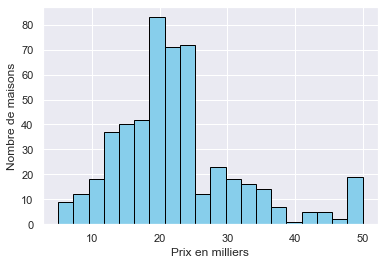

In [332]:
plt.hist(df.prix,bins=20,ec='black',color='skyblue')
plt.xlabel('Prix en milliers')
plt.ylabel('Nombre de maisons'); # histogramme des prix

C:\Users\Sadou BARRY\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


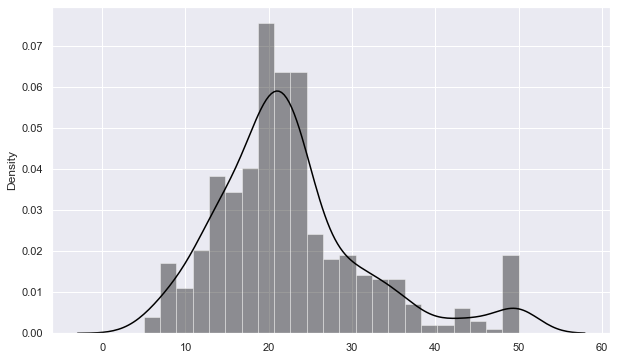

In [333]:
plt.figure(figsize=(10,6))
sns.distplot(x=df.prix,kde=True,color='black');

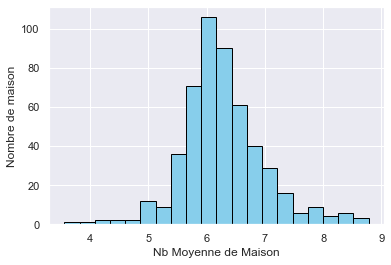

In [334]:
plt.hist(df.RM,bins=20,ec='black',color='skyblue')
plt.xlabel('Nb Moyenne de Maison')
plt.ylabel('Nombre de maison'); # histogramme des nombre de chambre

In [335]:
df.RAD.value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
2.0      24
8.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

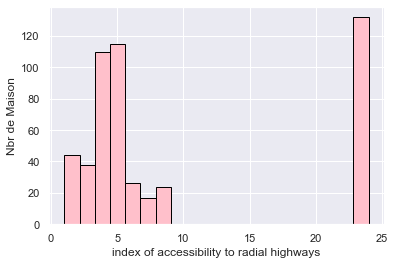

In [336]:
plt.hist(df.RAD,bins=20,ec='black',color='PINK')
plt.xlabel('index of accessibility to radial highways')
plt.ylabel('Nbr de Maison'); # histogramme des prix

In [337]:
df.CHAS.value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

### Correlation des données

In [338]:
df['prix'].corr(df["RM"]) # forte correlation positive entre le nombre de chambre et le prix

0.695359947071539

In [339]:
mask=np.zeros_like(df.corr())
indices_tr=np.triu_indices_from(mask)
mask[indices_tr]=True

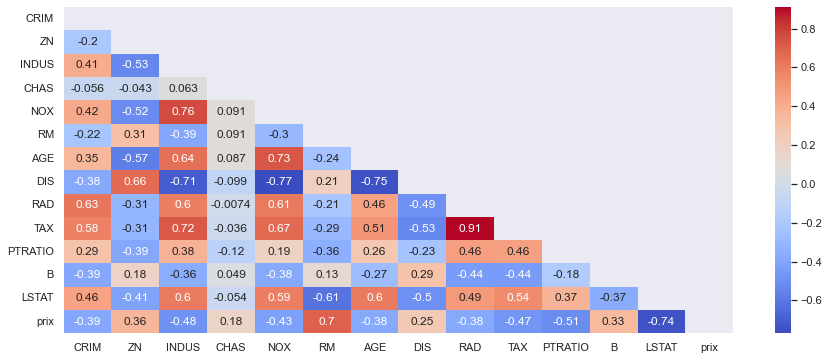

In [340]:
plt.figure(figsize=(15,6)) # visualisation des corrélation
sns.heatmap(df.corr(),cmap='coolwarm',annot=True,mask=mask);

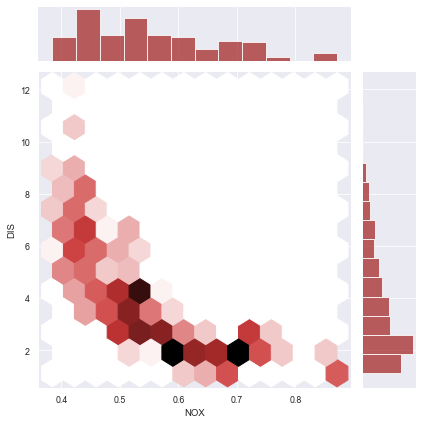

In [341]:
sns.set_context('paper')
sns.jointplot(x=df.NOX,y=df.DIS,data=df,color='brown',kind='hex')
sns.set()
plt.show();

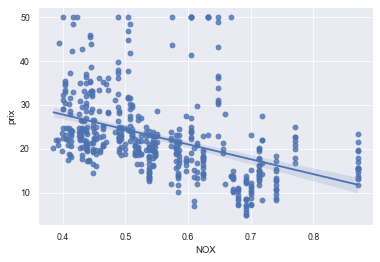

In [266]:
sns.set_context('paper')
sns.regplot(x=df.NOX,y=df.prix,data=df)
sns.set()
plt.show();

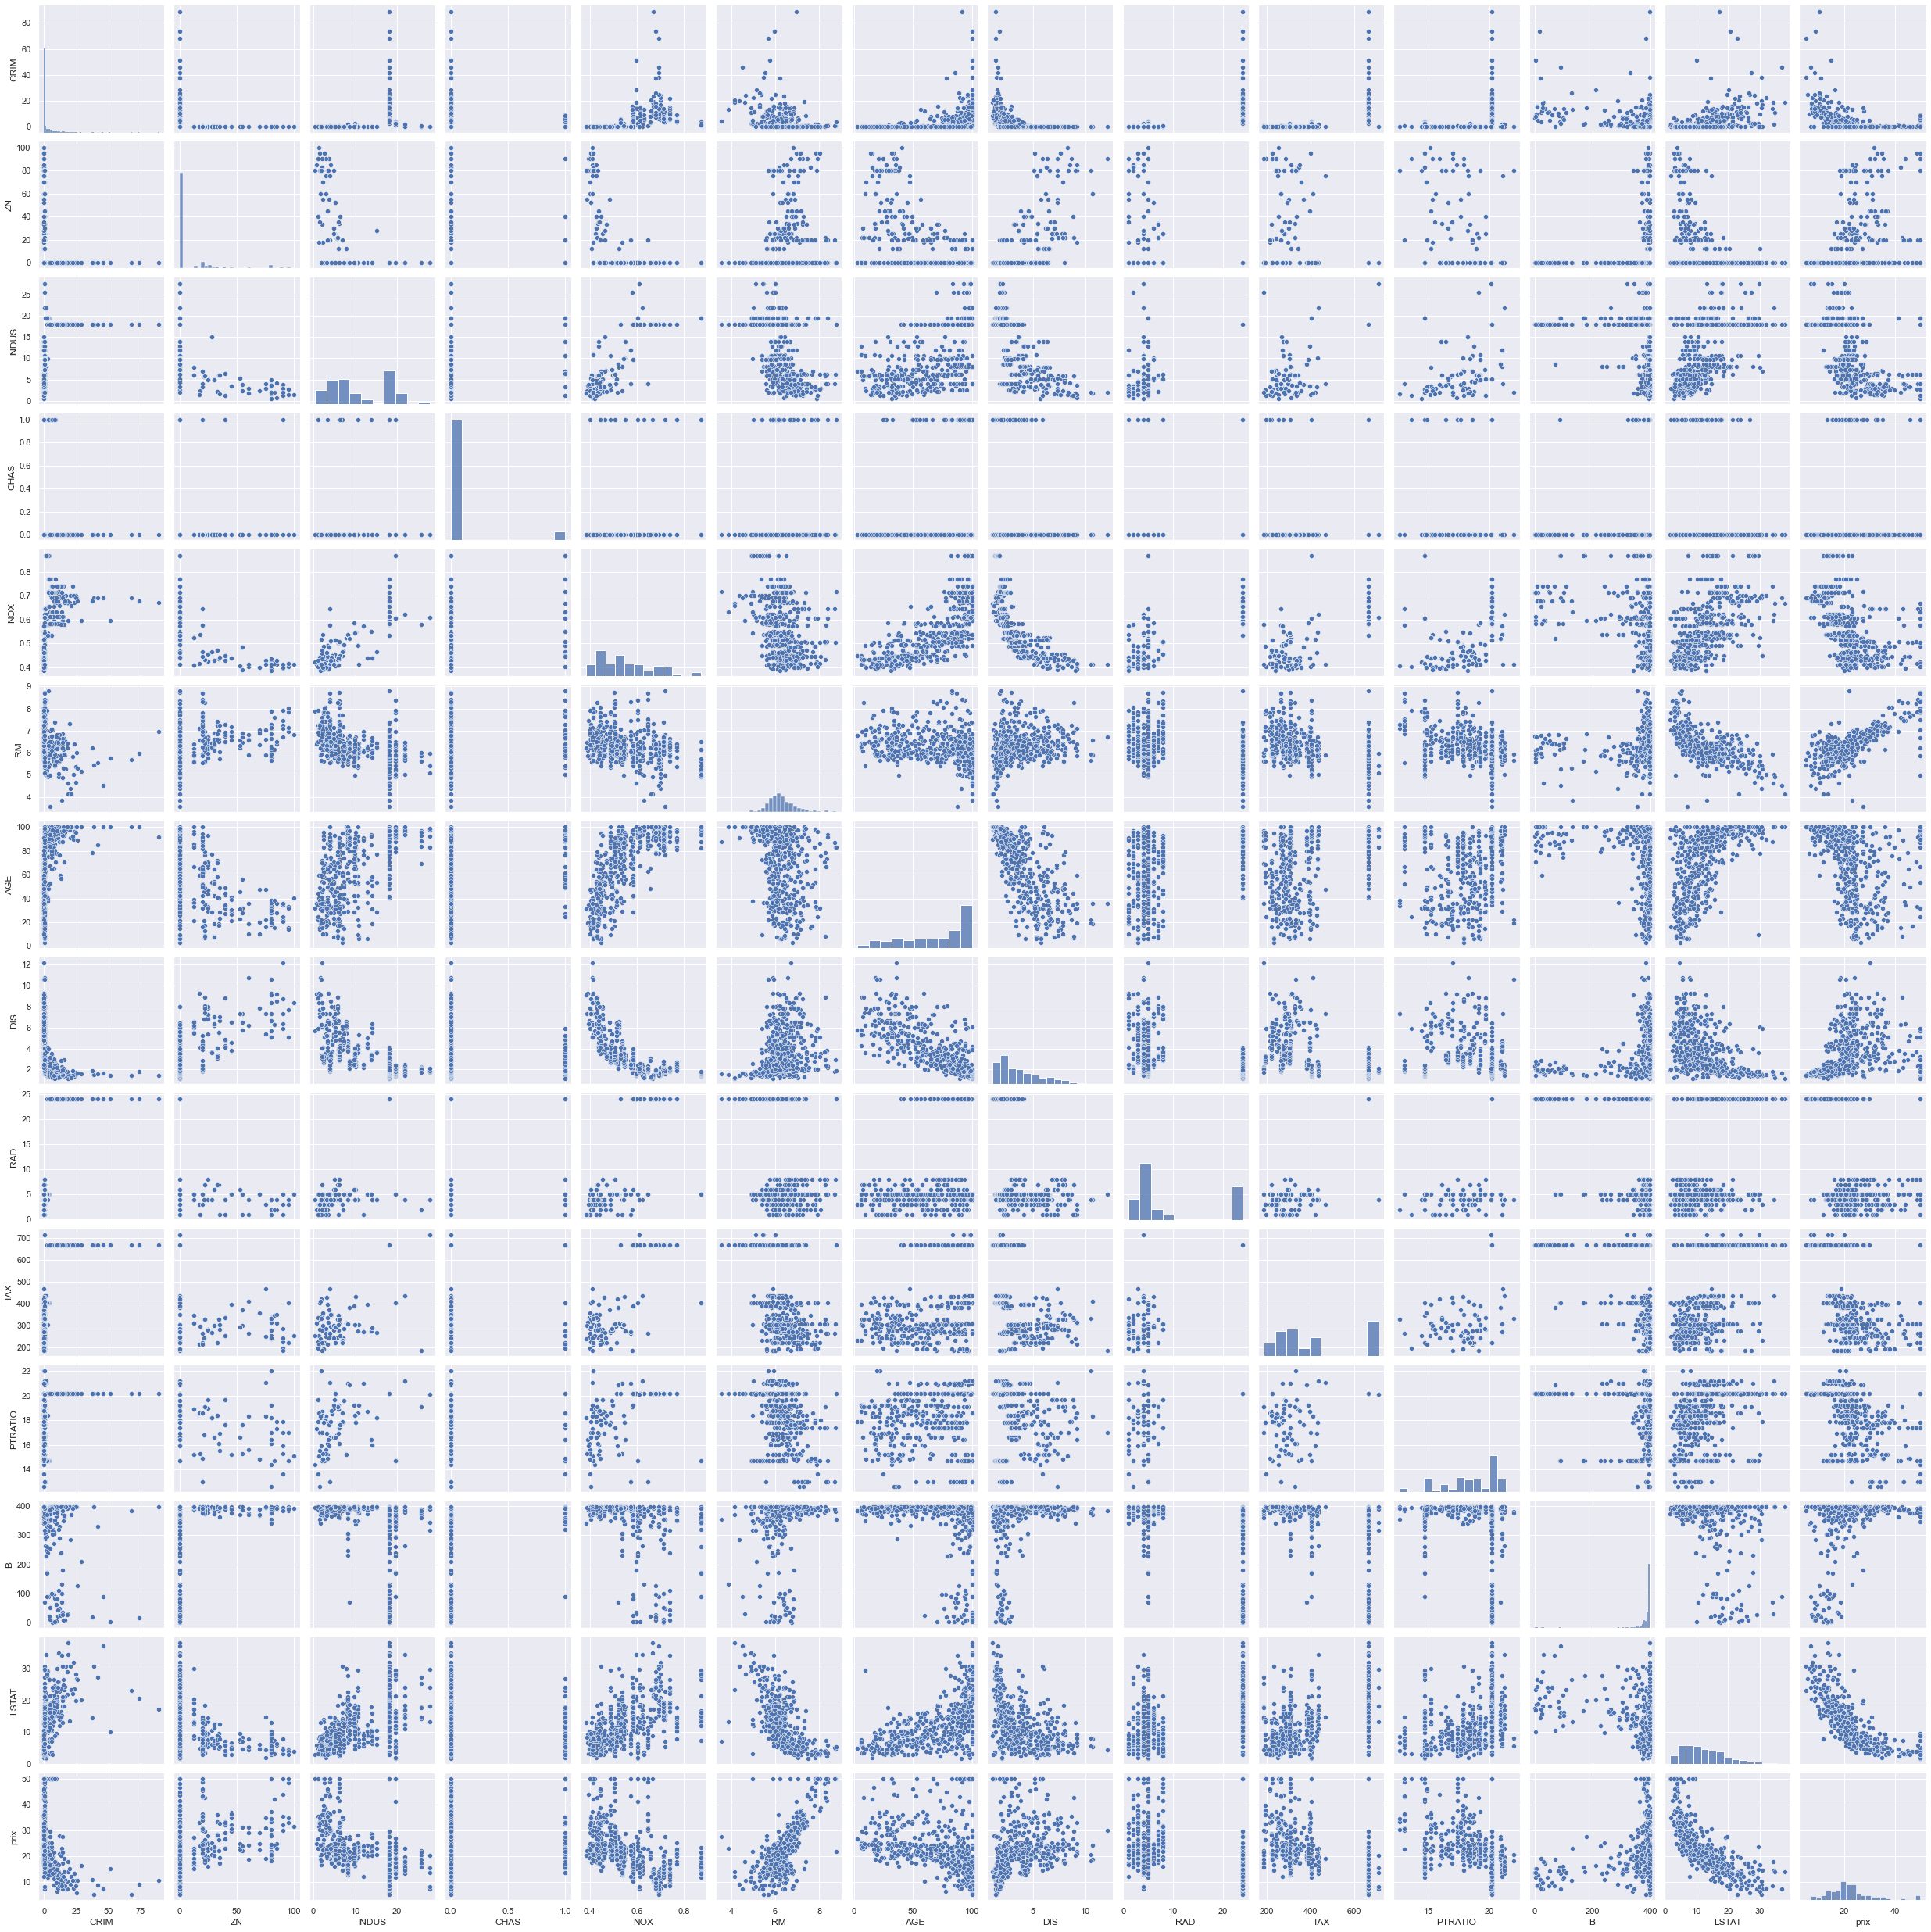

CPU times: total: 15.2 s
Wall time: 15.4 s


In [198]:
%%time
sns.pairplot(df)
plt.show()

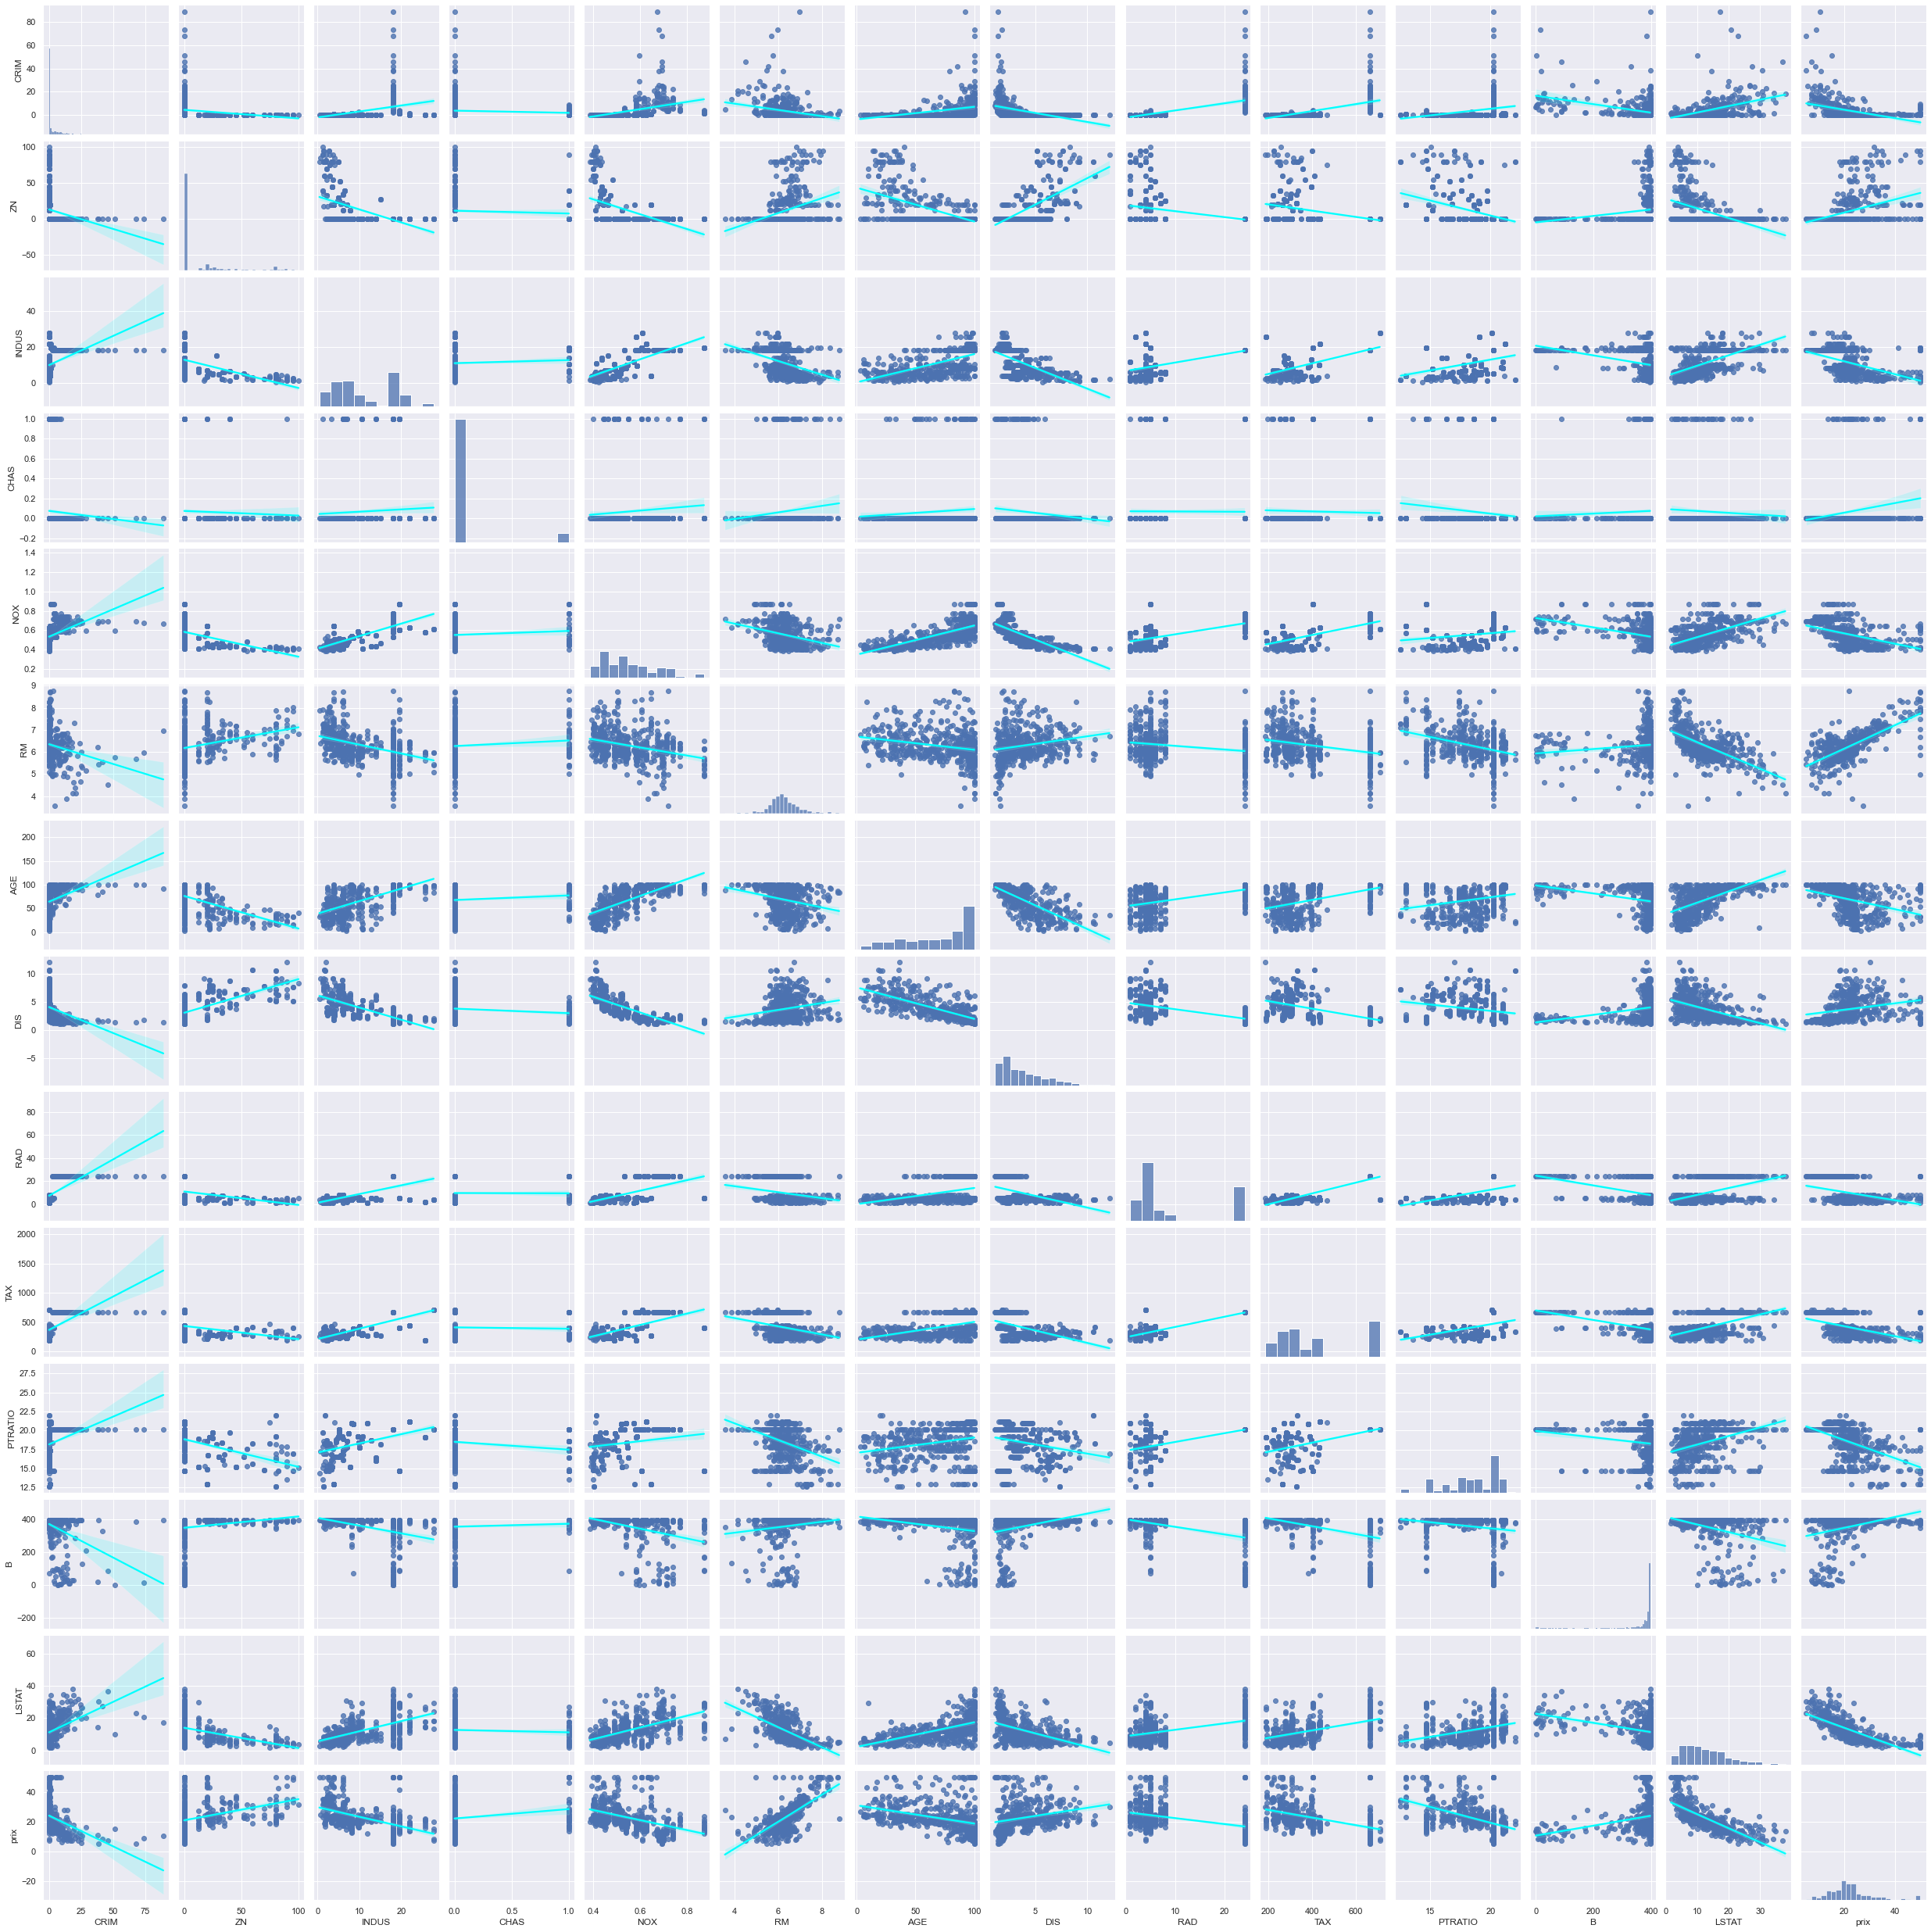

CPU times: total: 2min 33s
Wall time: 1min 50s


In [201]:
%%time
sns.pairplot(df,kind='reg',plot_kws={'line_kws':{'color':'cyan'}})
plt.show()

### Training and test split

In [342]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [343]:
X=df.drop('prix',axis=1)
y=df.prix

In [344]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [345]:
regr=LinearRegression()

In [346]:
regr.fit(X_train,y_train)

LinearRegression()

In [347]:
print(regr.intercept_)
print(f" le model permet d'expliquer {regr.score(X_test,y_test).round(2)*100}% sur les données de test")
print(f" le model permet d'expliquer {regr.score(X_train,y_train).round(2)*100}% sur les données d'entrainement")
pd.DataFrame(regr.coef_,index=X_train.columns,columns=['coef/effets_marginaux du Modèle niveau-niveau'])

29.83642016383913
 le model permet d'expliquer 68.0% sur les données de test
 le model permet d'expliquer 75.0% sur les données d'entrainement


,coef/effets_marginaux du Modèle niveau-niveau
CRIM,-0.128323
ZN,0.029552
INDUS,0.048859
CHAS,2.773503
NOX,-16.238829
RM,4.368755
AGE,-0.009248
DIS,-1.400867
RAD,0.257761
TAX,-0.009957


### Transformation des données en vu d'amélioration du Modele

In [348]:
# vérification de la normalité des données
print(df.prix.skew() )# on constate ques les données ne suivent pas une loi normale
print((np.log(df.prix)).skew()) # on peut normaliser les données avec une transformation log

1.1080984082549072
-0.33032129530987864


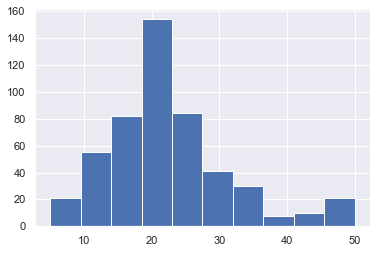

In [349]:
plt.hist(df.prix);

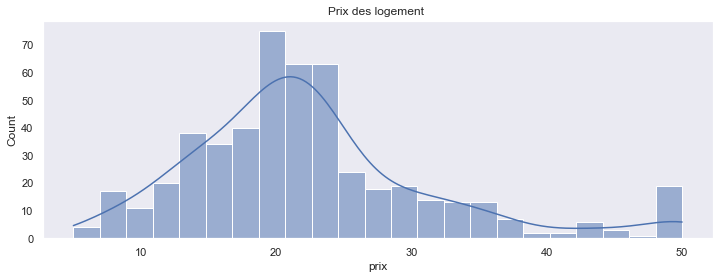

In [350]:
plt.figure(figsize=(12,4))

sns.histplot(df.prix,kde=True)
plt.title('Prix des logement ')
plt.grid()

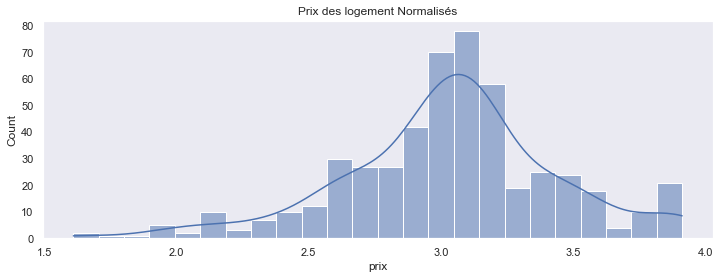

In [351]:
plt.figure(figsize=(12,4))

sns.histplot(np.log(df.prix),kde=True)
plt.title('Prix des logement Normalisés')
plt.grid()

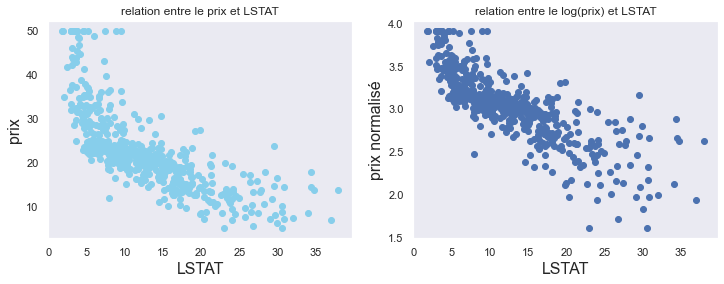

In [352]:
plt.figure(figsize=(12,4))


plt.subplot(1,2,1)
plt.scatter(df.LSTAT,df.prix,color='skyblue')
plt.xlabel('LSTAT',fontsize=16)
plt.ylabel('prix',fontsize=16)
plt.title('relation entre le prix et LSTAT')
plt.grid()

plt.subplot(1,2,2)
plt.scatter(df.LSTAT,np.log(df.prix))
plt.xlabel('LSTAT',fontsize=16)
plt.ylabel('prix normalisé',fontsize=16)
plt.title('relation entre le log(prix) et LSTAT')
plt.grid();

### Modèle niveau-log
$$[https://www.parisschoolofeconomics.eu/docs/yin-remi/interpretation-des-coefficients.pdf]$$

In [353]:
y=np.log(df.prix)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [354]:
regr_2=LinearRegression().fit(X_train,y_train)

In [355]:
print(regr_2.intercept_)
print(f" le model permet d'expliquer {regr_2.score(X_test,y_test).round(2)*100}% sur les données de test")
print(f" le model permet d'expliquer {regr_2.score(X_train,y_train).round(2)*100}% sur les données d'entrainement")
print("On peut constater qu'une augmentation d'une unité de NOX induit une baisse du prix de 65%")
pd.DataFrame(regr_2.coef_,index=X_train.columns,columns=["coef/le changement en % du prix par rapport à une augmenation d'une unite des autres variables "])

3.8147788462906957
 le model permet d'expliquer 75.0% sur les données de test
 le model permet d'expliquer 80.0% sur les données d'entrainement
On peut constater qu'une augmentation d'une unité de NOX induit une baisse du prix de 65%


,coef/le changement en % du prix par rapport à une augmenation d'une unite des autres variables
CRIM,-0.010773
ZN,0.000705
INDUS,0.003146
CHAS,0.095278
NOX,-0.653999
RM,0.107270
AGE,-0.000267
DIS,-0.046126
RAD,0.011143
TAX,-0.000488


### Vérification de la significativité des coefs avec l'api Statsmodels

In [356]:
import statsmodels.api as sm

In [406]:
constant_add=sm.add_constant(X_train)

In [407]:
model=sm.OLS(y_train,constant_add)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   prix   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     109.4
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          3.53e-117
Time:                        00:06:14   Log-Likelihood:                 98.794
No. Observations:                 379   AIC:                            -169.6
Df Residuals:                     365   BIC:                            -114.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8148      0.231     16.499      0.000       3.360       4.269
CRIM          -0.0108      0.002     -6.943      0.000      -0.014      -0.008
ZN             0.0007      0.001      1.072      0.284      -0.001       0.002
INDUS          0.0031      0.003      1.152      0.250      -0.002       0.009
CHAS           0.0953      0.038      2.480      0.014       0.020       0.171
NOX           -0.6540      0.175     -3.741      0.000      -0.998      -0.310
RM             0.1073      0.019      5.659      0.000       0.070       0.145
AGE           -0.0003      0.001     -0.439      0.661      -0.001       0.001
DIS           -0.0461      0.009     -4.937      0.000      -0.064      -0.028
RAD            0.0111      0.003      3.593      0.000       0.005       0.017
TAX           -0.0005      0.000     -2.831      0.005      -0.001      -0.000
PTRATIO       -0.0367      0.006     -6.217      0.000      -0.048      -0.025
B              0.0006      0.000      4.996      0.000       0.000       0.001
LSTAT         -0.0288      0.002    -12.688      0.000      -0.033      -0.024
==============================================================================
Omnibus:                       34.959   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.426
Skew:                           0.276   Prob(JB):                     2.89e-29
Kurtosis:                       5.832   Cond. No.                     1.48e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [388]:
df_coef=pd.DataFrame({'coef':result.params,'p_value':result.pvalues})
df_coef.head()## on constate donc que certains variables explicatives ne sont pas significative au seuil de 5%

,coef,p_value
const,3.814779,4.363299e-46
CRIM,-0.010773,1.766036e-11
ZN,0.000705,2.844434e-01
INDUS,0.003146,2.502379e-01
CHAS,0.095278,1.357496e-02


### test de multicollinéarité

In [389]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [390]:
vif=[]
for i in range(X_train.shape[1]+1):
    vif.append(variance_inflation_factor(exog=constant_add.values,exog_idx=i).round(3))

In [391]:
pd.DataFrame(vif,index=constant_add.columns,columns=['vif'])

,vif
const,561.316
CRIM,1.743
ZN,2.416
INDUS,3.778
CHAS,1.095
NOX,4.542
RM,1.951
AGE,2.981
DIS,4.080
RAD,7.452


In [458]:
X_train_simple=X_train.drop(['AGE','INDUS','ZN'],axis=1)

### Selection des Variables
##### on a contaté que la variables age n'étais pas significative et est fortement corrélée avec d'autres varibales

In [459]:
constant_add=sm.add_constant(X_train_simple)
model1=sm.OLS(y_train,constant_add,axis=1) # 
result1=model1.fit()
print(result1.bic)
print(result1.rsquared*100)

-129.70419573560002
79.44497516052398


C:\Users\Sadou BARRY\anaconda\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['axis']
  warnings.warn(msg, ValueWarning)


In [460]:
result1.summary() # On constate que toutes variables sont significativment différentes de 0

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   prix   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     142.2
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          7.62e-120
Time:                        21:48:20   Log-Likelihood:                 97.509
No. Observations:                 379   AIC:                            -173.0
Df Residuals:                     368   BIC:                            -129.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8310      0.230     16.647      0.000       3.378       4.284
CRIM          -0.0107      0.002     -6.920      0.000      -0.014      -0.008
CHAS           0.1001      0.038      2.621      0.009       0.025       0.175
NOX           -0.6398      0.161     -3.983      0.000      -0.956      -0.324
RM             0.1048      0.018      5.732      0.000       0.069       0.141
DIS           -0.0424      0.007     -5.664      0.000      -0.057      -0.028
RAD            0.0101      0.003      3.373      0.001       0.004       0.016
TAX           -0.0004      0.000     -2.421      0.016      -0.001   -7.05e-05
PTRATIO       -0.0384      0.005     -7.047      0.000      -0.049      -0.028
B              0.0006      0.000      4.939      0.000       0.000       0.001
LSTAT         -0.0289      0.002    -13.296      0.000      -0.033      -0.025
==============================================================================
Omnibus:                       34.043   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.302
Skew:                           0.273   Prob(JB):                     1.02e-27
Kurtosis:                       5.752   Cond. No.                     1.44e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [411]:
print(f'model simplifié {result1.rsquared.round(3)} avec un BIC de {result1.bic.round(2)}')
print(f'model non-simplifié {result.rsquared.round(3)} avec un BIC de {result.bic.round(2)}')

model simplifié 0.794 avec un BIC de -129.7
model non-simplifié 0.796 avec un BIC de -114.46


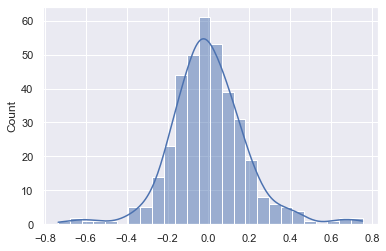

In [419]:
## les residus sont normalement distribuées
sns.histplot(result1.resid,kde=True)
plt.show()

<AxesSubplot:>

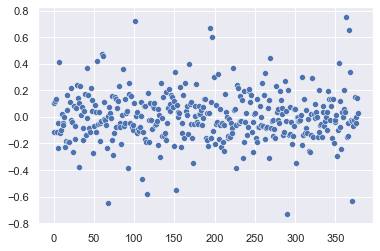

In [425]:
sns.scatterplot(x=range(len(result1.resid)),y=result1.resid)

In [426]:
result1.resid.describe() ,## residus=y_train-result1.fittedvalues

count    3.790000e+02
mean    -3.379882e-15
std      1.873277e-01
min     -7.348161e-01
25%     -1.110421e-01
50%     -1.097424e-02
75%      9.851483e-02
max      7.533550e-01
dtype: float64

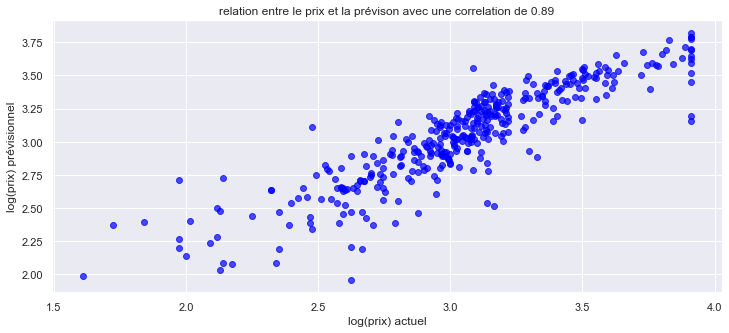

In [441]:
plt.figure(figsize=(12,5)) ## le modele peut etre amélioré en supprimant les outliers
plt.scatter(y_train,result1.fittedvalues,alpha=0.7,c='blue')
plt.xlabel('log(prix) actuel')
plt.ylabel('log(prix) prévisionnel')
plt.title(f"relation entre le prix et la prévison avec une correlation de {y_train.corr(result1.fittedvalues).round(2)}")
plt.show()

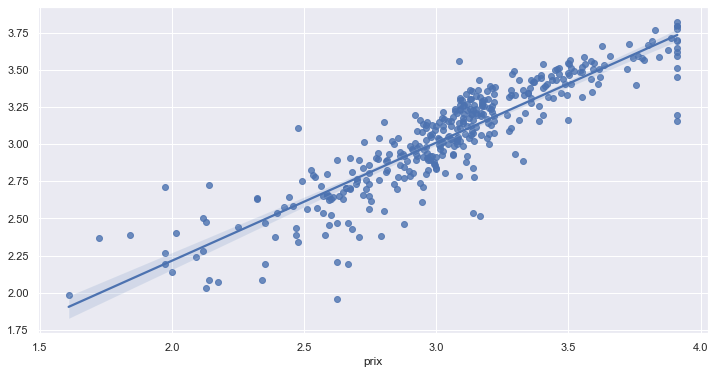

In [446]:
plt.figure(figsize=(12,6))
sns.regplot(x=y_train,y=result1.fittedvalues)
plt.show()

In [473]:
print(f' MSE: {np.exp(np.sqrt(result1.mse_resid))} \n la moyenne des prix: {np.exp(y_train.mean())}')

 MSE: 1.2090752489413032 
 la moyenne des prix: 21.100833216713255


In [463]:
X_test_simple=X_test.drop(['AGE','INDUS','ZN'],axis=1)

In [480]:
result1.params

const      3.831018
CRIM      -0.010688
CHAS       0.100059
NOX       -0.639776
RM         0.104769
DIS       -0.042414
RAD        0.010078
TAX       -0.000375
PTRATIO   -0.038358
B          0.000618
LSTAT     -0.028880
dtype: float64

In [466]:
coef=result1.params[1]
const=result1.params[0]

((379, 10), (127, 10))

In [483]:
const=sm.add_constant(X_test_simple)
prev=result1.predict(const)

In [524]:
df_test=pd.DataFrame(prev,columns=['prev'])

df_test['y_test']=y_test.values
df_test['erreur']=df_test.y_test-df_test.prev
df_test.reset_index(inplace=True)

In [525]:
len(y_test),len(prev)

(127, 127)

In [526]:
df_test=df_test.iloc[:,1:]

In [527]:
df_test=np.exp(df_test)*1000

In [528]:
df_test.head()

,prev,y_test,erreur
0,28491.586432,23600.0,828.314705
1,36335.084647,32400.0,891.700138
2,15024.387778,13600.0,905.194954
3,25752.103478,22800.0,885.364569
4,17049.894418,16100.0,944.287372


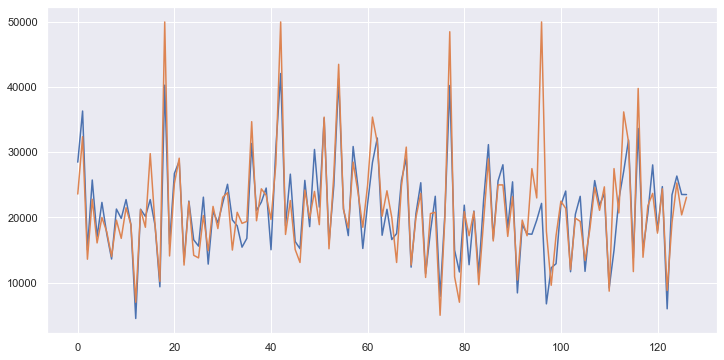

In [532]:
plt.figure(figsize=(12,6))
plt.plot(df_test.prev,label=True)
plt.plot(df_test.y_test,label=True);

In [530]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [535]:
print(f'MSE : {np.sqrt(mean_squared_error(df_test.y_test,df_test.prev))}\nMEA {mean_absolute_error(df_test.y_test,df_test.prev)}')

MSE : 4185.562262782428
MEA 2634.297805612786
